In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [40]:
train_dir = r"horse-or-human\horse-or-human\train"
val_dir=r"horse-or-human\horse-or-human\validation"

In [41]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True


)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.


In [42]:
vat_datagen=ImageDataGenerator(rescale=1./255)
train_gen=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


CNN Model


In [43]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),                     
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



c:\Users\Nishan Bhandari\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [44]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],

)


In [45]:
history=model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen
)

c:\Users\Nishan Bhandari\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6504 - loss: 0.6732 - val_accuracy: 0.6328 - val_loss: 1.2314
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 809ms/step - accuracy: 0.7877 - loss: 0.4486 - val_accuracy: 0.6133 - val_loss: 1.5910
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8549 - loss: 0.3254 - val_accuracy: 0.5859 - val_loss: 2.9920
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9163 - loss: 0.2057 - val_accuracy: 0.5703 - val_loss: 4.3338
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9231 - loss: 0.1951 - val_accuracy: 0.6484 - val_loss: 2.2795
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9163 - loss: 0.2084 - val_accuracy: 0.5664 - val_loss: 4.1237
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9377 - loss: 0.1550 - val_accuracy: 0.7969 - val_loss: 0.9624
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9649 - loss: 0.1158 - val_accuracy: 0.6836 - val_lo

In [ ]:
model.save("human_vs_horse_cnn.h5")

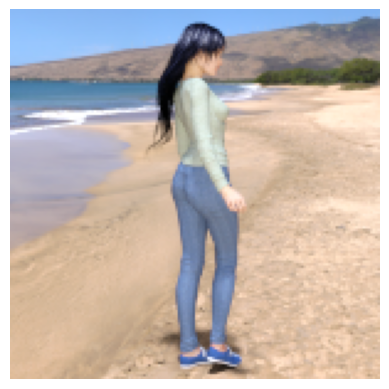

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
Human


In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
path = r'horse-or-human\horse-or-human\train\humans\human01-30.png'
img = image.load_img(r'horse-or-human\horse-or-human\train\humans\human01-30.png', target_size=(150,150))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)
img = image.load_img(path, target_size=(150, 150))
plt.imshow(img)
plt.axis('Off')
plt.show()

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Human")
else:
    print("Horse")
